In [1]:
%matplotlib inline
from pylab import *
from science import *

Version 0.0.6


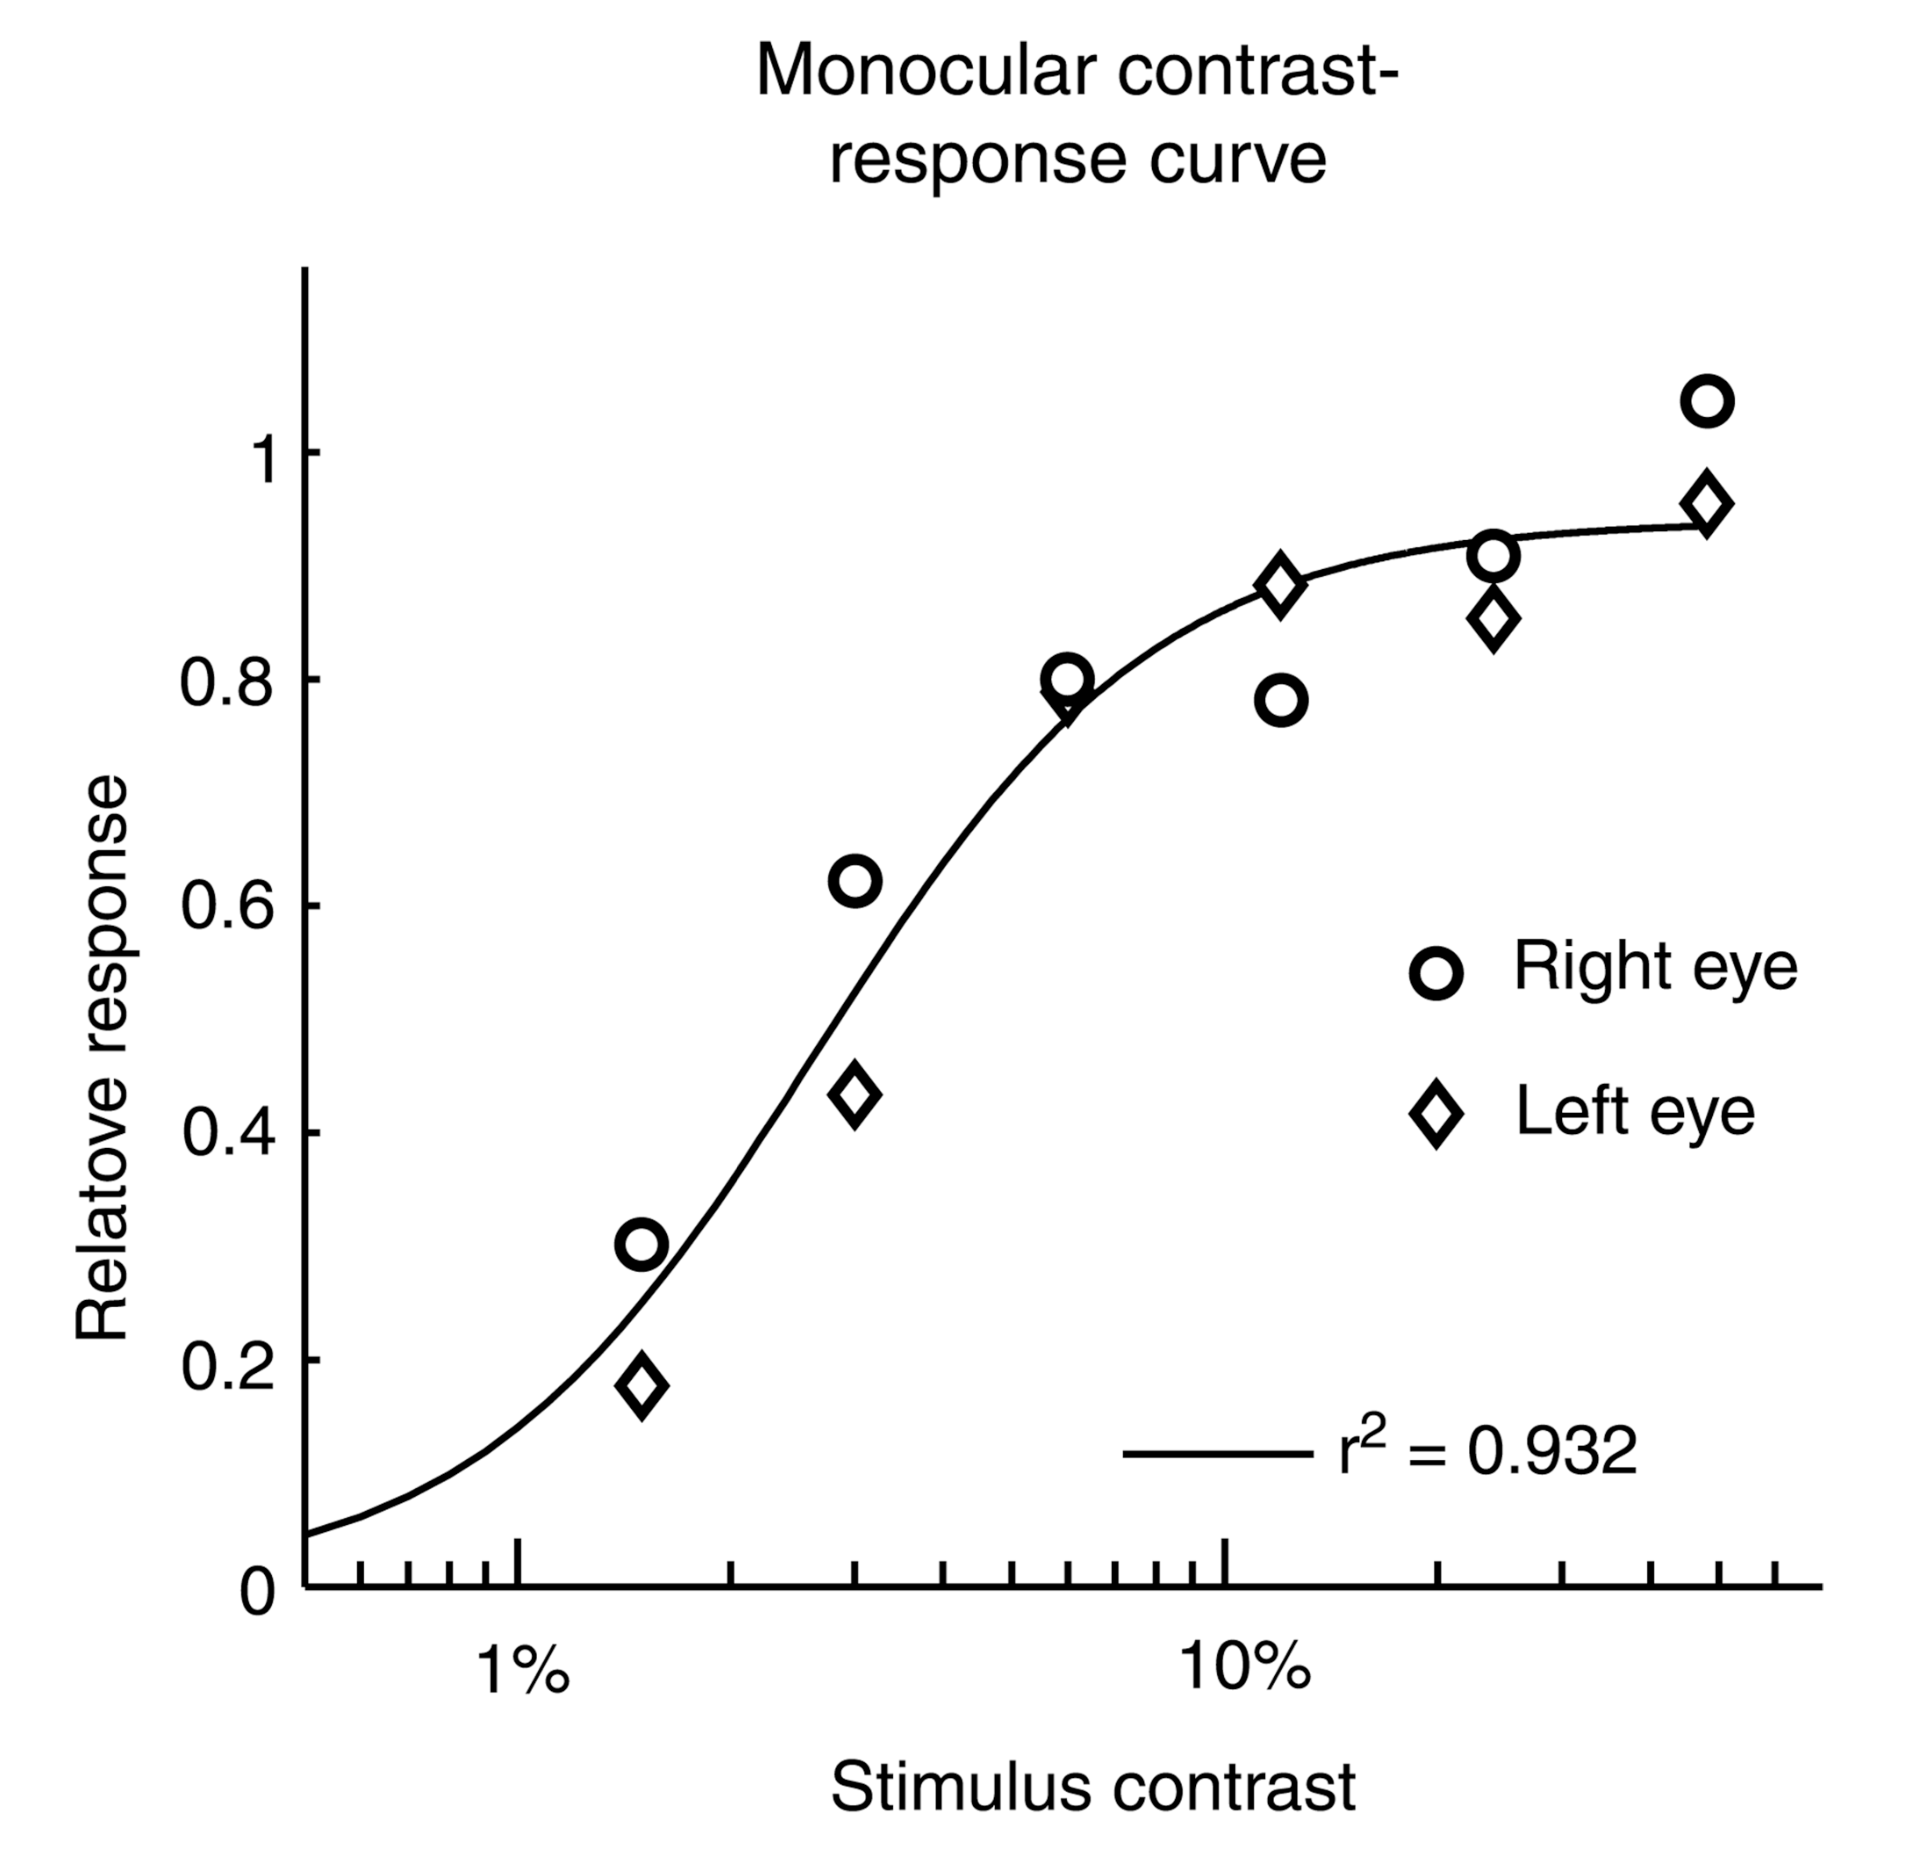

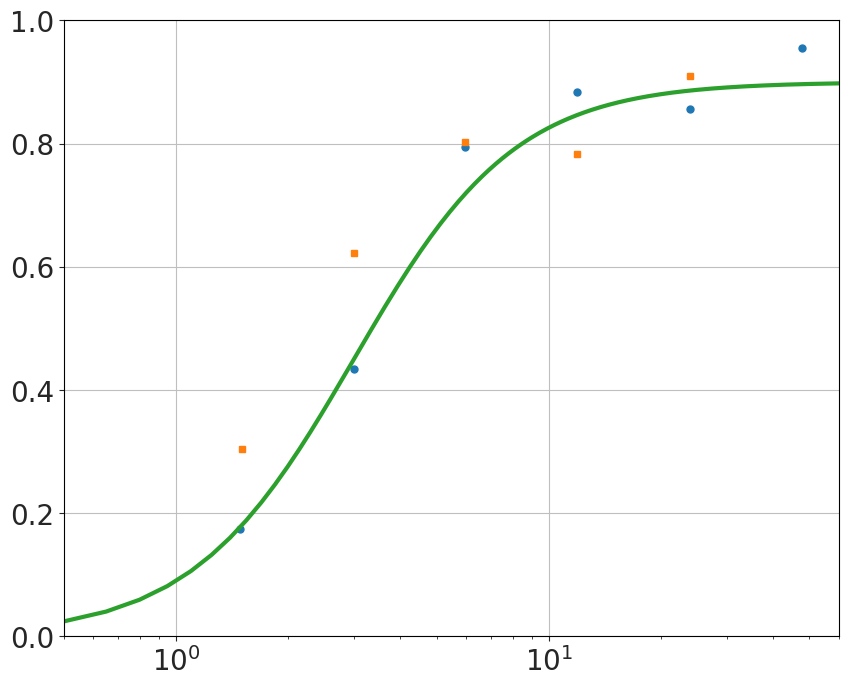

In [21]:
S="""1.4831025143361045	0.17464788732394365
3.00246170908555	0.43380281690140854
5.953533130814371	0.7943661971830986
11.928245710138414	0.8845070422535212
23.898925662310504	0.8563380281690142
47.88287076675383	0.9549295774647888
1.4985653124037583	0.3042253521126761
3.00246170908555	0.6225352112676057
5.953533130814371	0.8028169014084509
11.928245710138414	0.7830985915492958
23.898925662310504	0.9098591549295776
48.38209664925957	1.0507042253521128
"""
xy=array([[float(x) for x in _.split('\t')] for _ in S.strip().split('\n')])
N=6
x1=xy[:N,0]
y1=xy[:N,1]

x2=xy[N:,0]
y2=xy[N:,1]

plot(x1,y1,'o')
plot(x2,y2,'s')
xscale('log')
ylim([0,1])
xlim([.5, 60])


xx=linspace(.5,60,400)

a=.9
n=2
σ=3
yy=a*xx**n/(xx**n + σ**n)
plot(xx,yy,'-')

In [24]:
from scipy.optimize import curve_fit
def R(c,a,n,σ):
    return a*c**n/(c**n + σ**n)    

In [44]:
popt,pcov=curve_fit(R, xy[:,0], xy[:,1], p0=[.9,2,3])
popt

array([0.94281276, 1.80025267, 2.63276502])

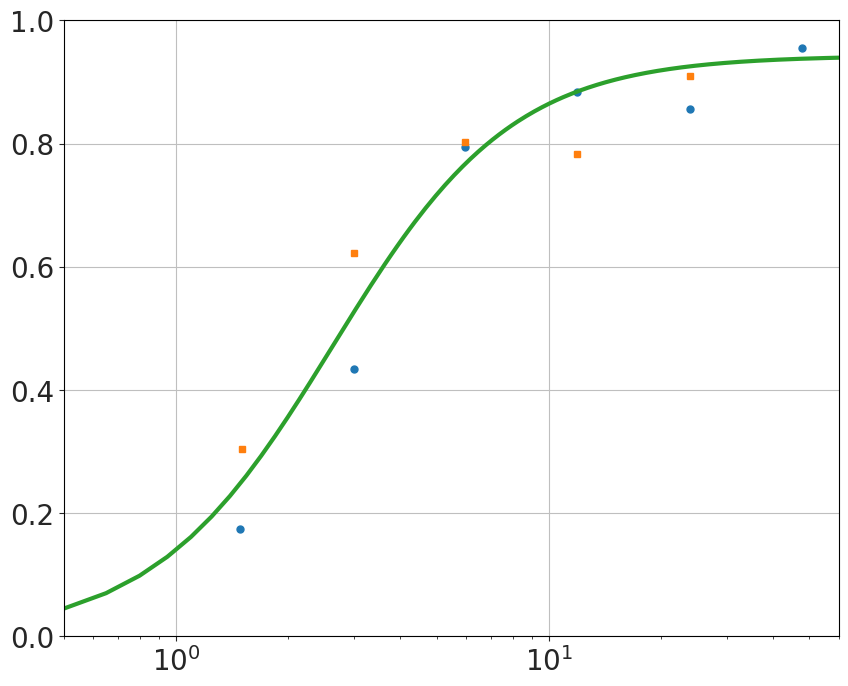

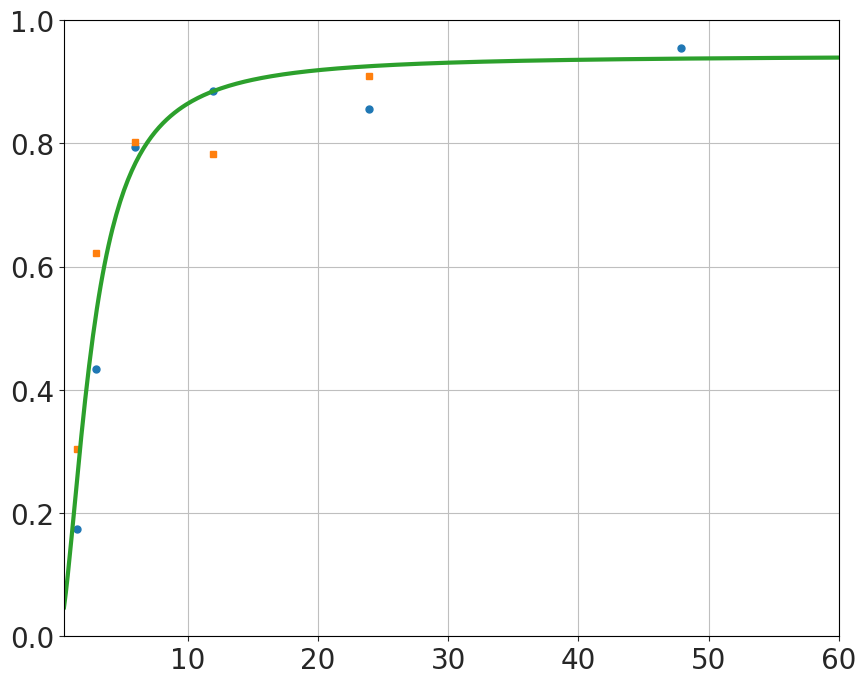

In [45]:
plot(x1,y1,'o')
plot(x2,y2,'s')
xscale('log')
ylim([0,1])
xlim([.5, 60])

xx=linspace(.5,60,400)
yy=R(xx,*popt)
plot(xx,yy,'-')

figure()

plot(x1,y1,'o')
plot(x2,y2,'s')
#xscale('log')
ylim([0,1])
xlim([.5, 60])

xx=linspace(.5,60,400)
yy=R(xx,*popt)
plot(xx,yy,'-')





Is this the same as a sigmoid, effectively?

In [65]:
def sigmoid(x,a,b,mn):
    
    y=a/(1+exp(-(x-mn)/b))
    
    return y

array([0.90124409, 1.35179132, 2.69966528])

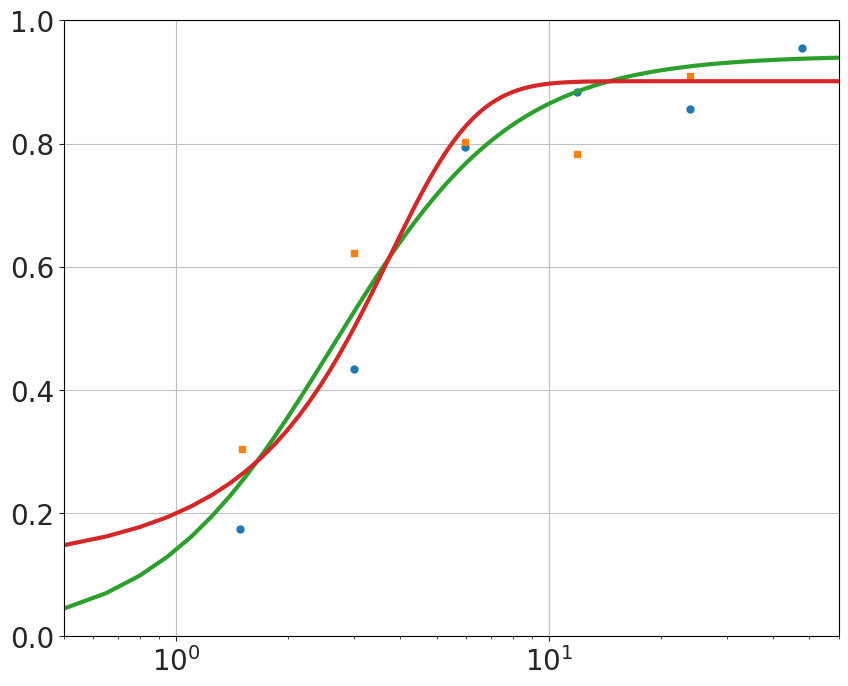

In [67]:

plot(x1,y1,'o')
plot(x2,y2,'s')
xscale('log')
ylim([0,1])
xlim([.5, 60])

xx=linspace(.5,60,400)

popt,pcov=curve_fit(R, xy[:,0], xy[:,1], p0=[.9,2,3])
yy=R(xx,*popt)
plot(xx,yy,'-')


popt,pcov=curve_fit(sigmoid, xy[:,0], xy[:,1], p0=[1.2,1.2,1])
yy=sigmoid(xx,*popt)
plot(xx,yy,'-')
popt